In [15]:

from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42) 

In [16]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [17]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [18]:
circles.label.value_counts()

,count
label,
1,500
0,500


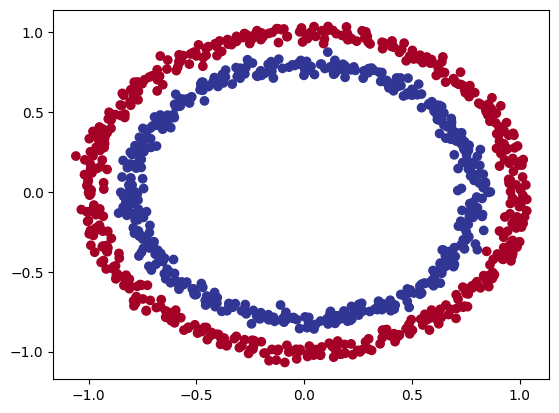

In [19]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [20]:
X.ndim, y.ndim, X.dtype, y.dtype, X.shape, y.shape

(2, 1, dtype('float64'), dtype('int64'), (1000, 2), (1000,))

In [21]:
type(X)

numpy.ndarray

In [22]:
import torch
from torch import nn
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.dataset import Dataset

In [23]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [26]:
X.device

device(type='cpu')

In [27]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [28]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4583,  0.5854],
                      [ 0.3462, -0.2100],
                      [-0.1714, -0.4698],
                      [ 0.2613, -0.7057],
                      [-0.2653, -0.2653]])),
             ('0.bias', tensor([ 0.2107, -0.6594, -0.5431, -0.3357, -0.6905])),
             ('1.weight',
              tensor([[-0.0835,  0.0618, -0.3169, -0.2772,  0.4165]])),
             ('1.bias', tensor([-0.2982]))])

In [29]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
    print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
    print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
    print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
    print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.2069],
        [-0.2160],
        [-0.3309],
        [-0.1711],
        [-0.5655],
        [-0.5693],
        [-0.4088],
        [-0.4922],
        [-0.3208],
        [-0.2192]])

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [30]:
loss_fn = nn.BCEWithLogitsLoss()
criteria = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [31]:
def accuracy(y_true, y_pred):
    return torch.eq(y_true, y_pred).sum().item() / len(y_true)

In [32]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)
y_logits

tensor([[-0.2069],
        [-0.2160],
        [-0.3309],
        [-0.1711],
        [-0.5655],
        [-0.5693],
        [-0.4088],
        [-0.4922],
        [-0.3208],
        [-0.2192],
        [-0.1750],
        [-0.2228],
        [-0.4570],
        [-0.3928],
        [-0.2888],
        [-0.5034],
        [-0.3173],
        [-0.1566],
        [-0.2026],
        [-0.1776],
        [-0.2109],
        [-0.5636],
        [-0.2080],
        [-0.1500],
        [-0.3432],
        [-0.4464],
        [-0.5108],
        [-0.5938],
        [-0.2761],
        [-0.4269],
        [-0.3861],
        [-0.3253],
        [-0.1731],
        [-0.5292],
        [-0.1596],
        [-0.2618],
        [-0.1983],
        [-0.3743],
        [-0.5057],
        [-0.4096],
        [-0.2064],
        [-0.2860],
        [-0.3242],
        [-0.5925],
        [-0.1628],
        [-0.2708],
        [-0.5924],
        [-0.2005],
        [-0.2594],
        [-0.5675],
        [-0.1711],
        [-0.1592],
        [-0.

In [33]:
probs = torch.sigmoid(y_logits)
probs

tensor([[0.4485],
        [0.4462],
        [0.4180],
        [0.4573],
        [0.3623],
        [0.3614],
        [0.3992],
        [0.3794],
        [0.4205],
        [0.4454],
        [0.4564],
        [0.4445],
        [0.3877],
        [0.4030],
        [0.4283],
        [0.3767],
        [0.4213],
        [0.4609],
        [0.4495],
        [0.4557],
        [0.4475],
        [0.3627],
        [0.4482],
        [0.4626],
        [0.4150],
        [0.3902],
        [0.3750],
        [0.3558],
        [0.4314],
        [0.3949],
        [0.4047],
        [0.4194],
        [0.4568],
        [0.3707],
        [0.4602],
        [0.4349],
        [0.4506],
        [0.4075],
        [0.3762],
        [0.3990],
        [0.4486],
        [0.4290],
        [0.4197],
        [0.3561],
        [0.4594],
        [0.4327],
        [0.3561],
        [0.4500],
        [0.4355],
        [0.3618],
        [0.4573],
        [0.4603],
        [0.3598],
        [0.3585],
        [0.3921],
        [0

In [34]:
y_preds = probs.round()

In [35]:
y_preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [36]:
# Train loop

epochs = 100

for epoch in range(epochs):
    model_0.train()
    logits = model_0(X_train)
    loss = loss_fn(torch.squeeze(logits), y_train)
    print("**Train**")
    print(loss)
    criteria.zero_grad()
    loss.backward()

    criteria.step()

    model_0.eval()
    with torch.inference_mode():
        logits = model_0(X_test)

        loss = loss_fn(torch.squeeze(logits), y_test)
        print("**Test**")
        print(loss)
        print(accuracy(y_test, logits.round().reshape(200)))
        print(y_test)
        print(logits.round())

**Train**
tensor(0.7132, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
**Test**
tensor(0.7143)
0.36
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])


In [37]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get(
        "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
    )
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

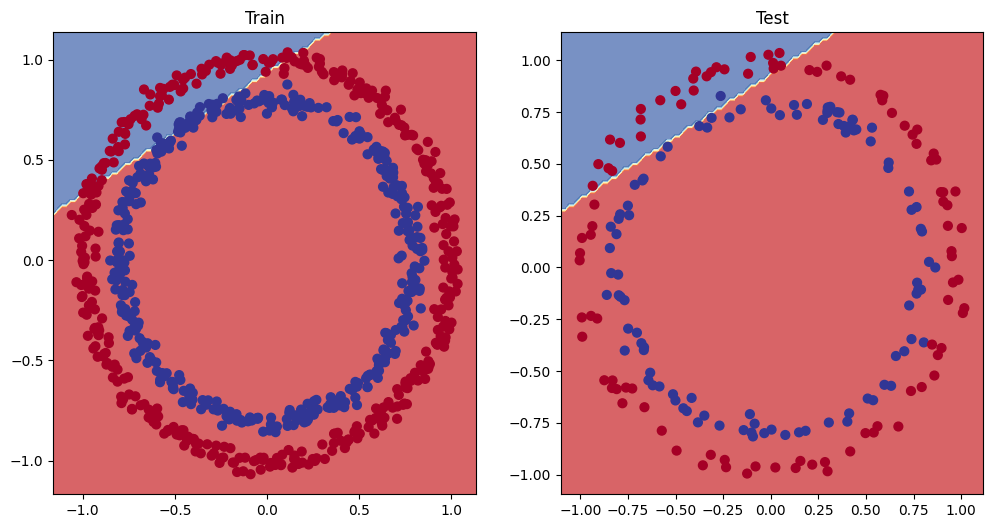

In [38]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [39]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=5)
        self.layer3 = nn.Linear(in_features=5, out_features=1)
    def forward(self, x):
        z = self.layer1(x)
        z = self.layer2(z)
        z = self.layer3(z)
        return z
    
model_1 = CircleModelV2()

In [40]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [41]:
torch.manual_seed(42)
epochs = 60
train_loss = []
test_loss = []
train_acc = []
test_acc = []
epoch_list = []

for epoch in range(epochs):
    epoch_list.append(epoch)
    model_1.train()

    logits = model_1(X_train)

    loss = loss_fn(y_train, logits.squeeze())
    train_loss.append(loss.detach().numpy())
    train_acc.append(accuracy(y_true=y_train, y_pred=logits.reshape(-1).round()))
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        logits = model_1(X_test)

        loss = loss_fn(y_test, logits.squeeze())
        test_loss.append(loss.detach().numpy())
        test_acc.append(accuracy(y_true=y_test, y_pred=logits.reshape(-1)))
        optimizer.zero_grad()

    if epoch % 10 == 0:
        print(f"*******{epoch}*******")
        print(f"Train loss: {train_loss[-1]} | Train accuracy: {train_acc[-1]}")
        print(f"Test loss: {test_loss[-1]} | Test accuracy: {test_acc[-1]}")

*******0*******
Train loss: 1.1172370910644531 | Train accuracy: 0.5
Test loss: 1.0625386238098145 | Test accuracy: 0.0
*******10*******
Train loss: 0.6189820170402527 | Train accuracy: 0.5
Test loss: 0.5633078813552856 | Test accuracy: 0.0
*******20*******
Train loss: -0.19522714614868164 | Train accuracy: 0.0
Test loss: -0.34434568881988525 | Test accuracy: 0.0
*******30*******
Train loss: -4.582409381866455 | Train accuracy: 0.0
Test loss: -6.0915846824646 | Test accuracy: 0.0
*******40*******
Train loss: -887.1553955078125 | Train accuracy: 0.0
Test loss: -3621.92529296875 | Test accuracy: 0.0
*******50*******
Train loss: nan | Train accuracy: 0.0
Test loss: nan | Test accuracy: 0.0


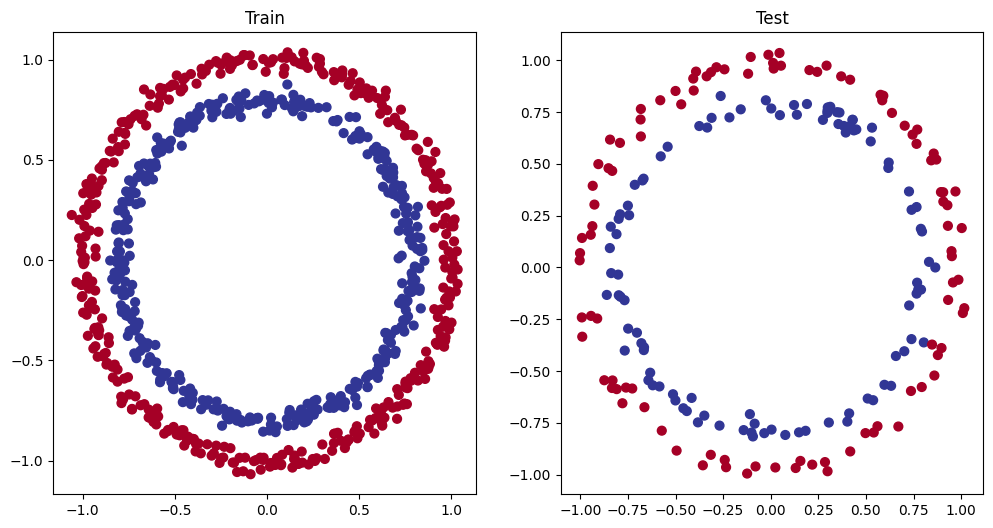

In [42]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

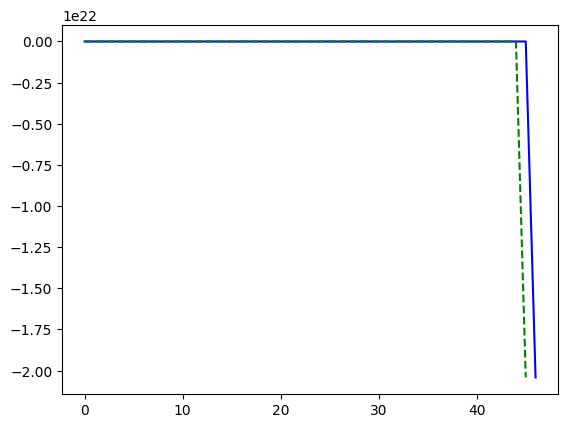

In [43]:
plt.plot(epoch_list, train_loss, "b-", label="Train Loss")
plt.plot(epoch_list, test_loss, "g--", label="Test Loss")
plt.show()

In [44]:
from torch import nn


class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()  

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)
